# Análise dos Microdados do Enem

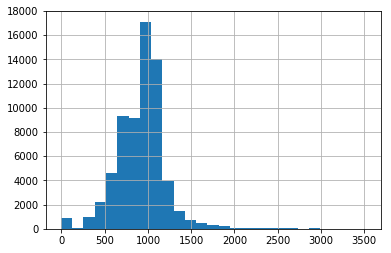

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

indicePrecosComerciais = pd.read_csv("dados/business-price-indexes-march-2020-quarter-csv.csv",sep=",", encoding="ISO-8859-1", low_memory=False)
indicePrecosComerciais.columns.values
colunasSelecionadas = ['Series_reference', 'Period', 
                       'Data_value', 'STATUS', 'UNITS',
                       'Subject', 'Group']
indicesPrecosSelecionados = indicePrecosComerciais.filter(items=colunasSelecionadas)
colunaDataValue = indicesPrecosSelecionados["Data_value"]
colunaDataValue.hist(bins=27)
plt.show()

In [2]:
colunaSubject = indicesPrecosSelecionados["Subject"]
colunaSubject.value_counts()

Producers Price Index - PPI        41470
Farm Inputs - FPI                  16202
Capital Goods Price Index - CEP     7625
Energy Statistics - NRG             1229
Name: Subject, dtype: int64

In [3]:
colunasSubjectDataValue = ['Subject', 'Data_value']
dataFrameSubjectDataValue = indicesPrecosSelecionados.filter(items=colunasSubjectDataValue)
dataFrameSubjectDataValue = dataFrameSubjectDataValue.dropna() #Elimina NaN
dataFrameSubjectDataValue.groupby('Subject').count()

,Data_value
Subject,
Capital Goods Price Index - CEP,7625
Energy Statistics - NRG,1229
Farm Inputs - FPI,15802
Producers Price Index - PPI,41470


In [4]:
dataFrameSubjectDataValue.groupby('Subject').max()

,Data_value
Subject,
Capital Goods Price Index - CEP,3153.000000
Energy Statistics - NRG,3512.000000
Farm Inputs - FPI,1642.313546
Producers Price Index - PPI,2270.000000


In [5]:
dataFrameSubjectDataValue.groupby('Subject').min()

,Data_value
Subject,
Capital Goods Price Index - CEP,-1.200000
Energy Statistics - NRG,587.000000
Farm Inputs - FPI,207.913106
Producers Price Index - PPI,-5.800000


In [6]:
 dataFrameSubjectDataValue[dataFrameSubjectDataValue.Data_value > 0].groupby('Subject').min()

,Data_value
Subject,
Capital Goods Price Index - CEP,0.100000
Energy Statistics - NRG,587.000000
Farm Inputs - FPI,207.913106
Producers Price Index - PPI,0.100000


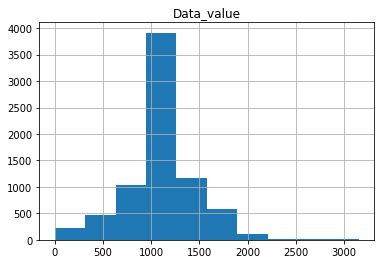

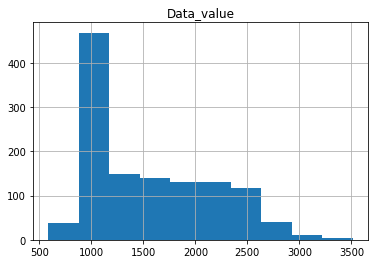

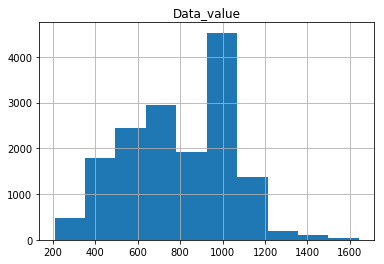

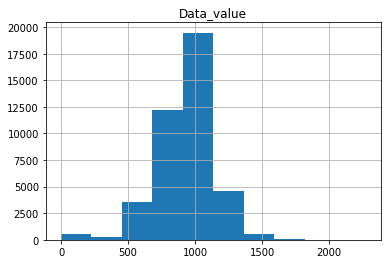

In [7]:
dataFrameSubjectDataValue[dataFrameSubjectDataValue.Data_value > 0].groupby('Subject').hist()
plt.show()

In [8]:
dataFrameSubjectDataValue[dataFrameSubjectDataValue.Data_value > 0].groupby('Subject').describe()

Data_value                           \
                                     count         mean         std   
Subject                                                               
Capital Goods Price Index - CEP     7590.0  1100.475337  385.614226   
Energy Statistics - NRG             1229.0  1550.741253  603.775847   
Farm Inputs - FPI                  15802.0   795.056826  249.364521   
Producers Price Index - PPI        41364.0   933.656577  222.874989   

                                                                               \
                                        min          25%          50%     75%   
Subject                                                                         
Capital Goods Price Index - CEP    0.100000   962.823367  1067.454874  1270.0   
Energy Statistics - NRG          587.000000  1005.000000  1386.000000  2042.0   
Farm Inputs - FPI                207.913106   594.965675   798.202920  1004.0   
Producers Price Index - PPI        0.100000   791.211579   983.000000  1069.0   

                                              
                                         max  
Subject                                       
Capital Goods Price Index - CEP  3153.000000  
Energy Statistics - NRG          3512.000000  
Farm Inputs - FPI                1642.313546  
Producers Price Index - PPI      2270.000000